In [2]:
import sys
import json
from model import SalesPredictionLSTM
from data_utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [3]:
train_file = "data/sales.csv"
window_size = 6
train_test_split = 0.8
(
    x_train, y_train, x_test, y_test,
    x_test_raw, y_test_raw, 
    last_window_raw, last_window
) = load_timeseries(train_file, window_size, train_test_split)

In [4]:
model = SalesPredictionLSTM(
    layers=[ window_size, 100, 100, 1 ],
    dropout=0.2,
    batch_size=1,
    epochs=1,
    validation_split=0.1
)

In [5]:
model.build_model()
model.load_weights("weights.h5")

W1115 11:33:33.750294 140708070029120 deprecation_wrapper.py:119] From /home/lorenzo/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1115 11:33:33.766442 140708070029120 deprecation_wrapper.py:119] From /home/lorenzo/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1115 11:33:33.772382 140708070029120 deprecation_wrapper.py:119] From /home/lorenzo/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1115 11:33:34.044861 140708070029120 deprecation_wrapper.py:119] From /home/lorenzo/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.place

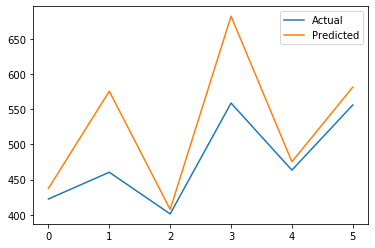

The next time stamp forecasting is: 835.830925590669


In [6]:
predicted = model.predict(x_test)        
predicted_raw = []
for i in range(len(x_test_raw)):
    mean = np.mean(x_test_raw[i])
    deviation = max(x_test_raw[i]) - min(x_test_raw[i])
    predicted_raw.append((predicted[i] * deviation) + mean)

# Plot graph: predicted VS actual
plt.subplot(111)
plt.plot(predicted_raw, label='Actual')
plt.plot(y_test_raw, label='Predicted')	
plt.legend()
plt.show()

# Predict next time stamp 
next_timestamp = model.predict(last_window)
mean = np.mean(last_window_raw[0])
deviation = max(last_window_raw[0]) - min(last_window_raw[0])
next_timestamp_raw = (next_timestamp[0]+deviation) + mean
print('The next time stamp forecasting is: {}'.format(next_timestamp_raw))

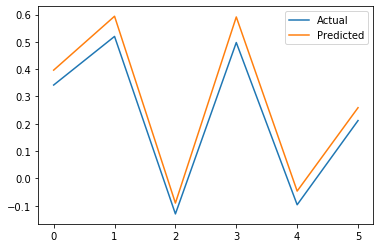

In [7]:
# Plot graph: predicted VS actual
plt.subplot(111)
plt.plot(predicted, label='Actual')
plt.plot(y_test, label='Predicted')	
plt.legend()
plt.show()